In [100]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression

In [101]:
uri_to_data_frame = "https://raw.githubusercontent.com/sherri-ice/DataAnalyseProject/main/dataframe.csv"
data_frame =  pd.read_csv(uri_to_data_frame)
data_frame

,Отметка времени,Ваш пол,Ваш факультет,Ваш средний балл,"Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)",Ваш знак зодиака,Как часто Вы пьёте алкоголь?,Как часто Вы курите (сигареты/вейп/кальян)?,Как часто Вы пьёте кофе/энергетики?,Работаете ли Вы на данный момент?,Как часто Вы посещаете пары?,Сколько Вы спите в будний день?,Были ли у Вас серьёзные мысли об отчислении?,"Были ли у Вас мысли о суициде, была ли депрессия?",Болели ли Вы Covid-19?,Как часто Вы ходите в библиотеку?,Кем Вы себя считаете?,Состоите ли Вы в Студенческом союзе или похожих организациях?,Есть ли у Вас хобби вне университета?,Есть ли у Вас отношения?,Занимаетесь ли Вы спортом?,Вы учитесь на платной или бесплатной основе?,Количество пересдач за всё время обучения,Вы натуральный блондин
0,2021/11/26 12:21:04 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,Нет(
1,2021/11/26 12:21:41 PM GMT+3,Предпочитаю не говорить (подаюсь в гугл),ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Нет,Да,Да,"Да, но только на физре",Платно,1-5 пересдач,Нет(
2,2021/11/26 12:21:57 PM GMT+3,Мужской,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Интроверт,Нет,Да,Нет,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
3,2021/11/26 12:22:31 PM GMT+3,Женский,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел","Редко, 1-2 раза в месяц",Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),"Да, на всю страну такой один"
4,2021/11/26 12:22:53 PM GMT+3,Мужской,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,Нет,Нет,"Нет, не болел",Не хожу в библиотеку,Экстраверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,2021/12/05 12:48:57 AM GMT+3,Мужской,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Да,"Да, во время студенчества",Не хожу в библиотеку,Экстраверт,Да,Да,Да,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
230,2021/12/05 1:45:07 PM GMT+3,Женский,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,Нет,Да,"Да, до поступления",Не хожу в библиотеку,Амбиверт,Нет,Да,Да,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
231,2021/12/05 8:54:15 PM GMT+3,Женский,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,Да,Да,"Нет, не болел",Не хожу в библиотеку,Амбиверт,Нет,Да,Нет,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),Нет(
232,2021/12/06 3:36:11 AM GMT+3,Мужской,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,Да,Нет,"Да, во время студенчества",Не хожу в библиотеку,Интроверт,Да,Да,Да,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,Нет(


#Чистим датасет

Переименуем колонки для более компактного кода

In [102]:
data_frame.rename(columns = {'Отметка времени':'time', \
                             'Ваш пол':'gender', \
                             'Ваш факультет': 'faculty',\
                             'Ваш средний балл': 'average_grade',
                             'Сколько времени в среднем в день Вы уделяете учебе (домашние работы, лабораторные)':'study_time',\
                             'Ваш знак зодиака': 'zodiac_sign',\
                             'Как часто Вы пьёте алкоголь?': 'alcohol',\
                             'Как часто Вы курите (сигареты/вейп/кальян)?': 'smoke',\
                             'Как часто Вы пьёте кофе/энергетики?': 'coffee',\
                             'Работаете ли Вы на данный момент?': 'work', \
                             'Как часто Вы посещаете пары?': 'attendance', \
                             'Сколько Вы спите в будний день?': 'sleep',\
                             'Были ли у Вас серьёзные мысли об отчислении?':'expulsion', \
                             'Были ли у Вас мысли о суициде, была ли депрессия?': 'depression',
                             'Болели ли Вы Covid-19?': 'covid19',
                             'Как часто Вы ходите в библиотеку?': 'library_attendance',\
                             'Кем Вы себя считаете?': 'person_type', \
                             'Состоите ли Вы в Студенческом союзе или похожих организациях?': 'student_union', \
                             'Есть ли у Вас хобби вне университета?': 'hobby',\
                             'Есть ли у Вас отношения?': 'relationship',\
                             'Занимаетесь ли Вы спортом?': 'sport',\
                             'Вы учитесь на платной или бесплатной основе?': 'education_type', \
                             'Количество пересдач за всё время обучения': 'failed_exams',
                             'Вы натуральный блондин': 'blond'},\
                             inplace=True)


Удалим столбец с временем заполнения формы, он нас не интересует:

In [103]:
data_frame = data_frame.drop('time', axis = 1)

В некотрых столбцах заменим данные типа Да/Нет на True/False. Помимо этого для столбца `covid19` в опросе уточнялось, когда именно вы болели: до поступления или во время вашего студенчества. Мы решаем, что нам важнее просто информация о том, болел ли человек, поэтому заменяем оба этих варианта на True.

In [104]:
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Да, во время студенчества', 'Да, до поступления', 'Да', 
                                                                                                                           'Да, на всю страну такой один'], True)
data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 'blond']] = data_frame[['covid19', 'expulsion', 'depression', 'student_union', 'relationship', 'hobby', 
                                                                                                        'blond']].replace(['Нет, не болел', 'Нет', 'Нет('], False)

В колонке `gender` помимо вариантов ответа "мужской", "женский", мы получили несколько неопределенных вариантов, которые для нас равносильны `Nan`. Просто выкинуть их из датасета мы не можем, так как нам важна остальная информация в этих строчках.

In [105]:
data_frame.gender

0      Предпочитаю не говорить (подаюсь в гугл)
1      Предпочитаю не говорить (подаюсь в гугл)
2                                       Мужской
3                                       Женский
4                                       Мужской
                         ...                   
229                                     Мужской
230                                     Женский
231                                     Женский
232                                     Мужской
233                                     Женский
Name: gender, Length: 234, dtype: object

Так как корректных данных в колонке гораздо больше, мы решили невалидные данные заменить в том же процентном отношении, в котором сейчас находятся ответы Мужской / Женский.

In [106]:
data_frame['gender'].replace(['Мужской'], 'm', inplace = True)
data_frame['gender'].replace(['Женский'], 'f', inplace = True)
gender = data_frame.loc[:, 'gender']
gender = DataFrame(gender.value_counts())

num_of_men = gender.loc['m']
num_of_women = gender.loc['f']
percent_of_men = num_of_men / (num_of_women + num_of_men)
num_of_men = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] * percent_of_men) 
num_of_women = int(gender.loc['Предпочитаю не говорить (подаюсь в гугл)'] - num_of_men)

In [107]:
data_frame.gender.replace(['Предпочитаю не говорить (подаюсь в гугл)'], np.nan, inplace = True)
print('Уникальные поля до замены ', data_frame.gender.unique())
data_frame.gender.fillna('m', limit = num_of_men, inplace = True)
print('Уникальные поля после замены части Nan-ов ', data_frame.gender.unique())
data_frame.gender.fillna('f', limit = num_of_women, inplace = True)
print('Уникальные поля после замены всех некорректных данных ', data_frame.gender.unique())

Уникальные поля до замены  [nan 'm' 'f']
Уникальные поля после замены части Nan-ов  ['m' 'f' nan]
Уникальные поля после замены всех некорректных данных  ['m' 'f']


Рассмотри колонку `faculty`. Из графика видно, что получилось неоднородная выборка по факультетам университета. Поэтому в дальнейшем учитывать принадлежность к факультету мы не будем.

<BarContainer object of 15 artists>

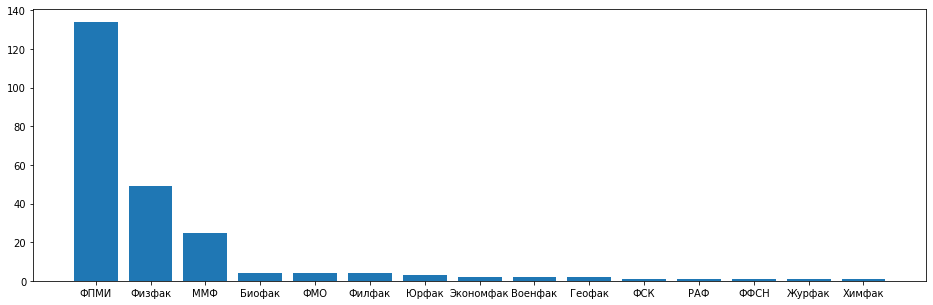

In [108]:
plt.figure(figsize=(16, 5))
unique_faculty = data_frame.faculty.value_counts()
plt.xticks(np.arange(unique_faculty.index.size), unique_faculty.index)
plt.bar(range(data_frame.faculty.unique().size), data_frame.faculty.value_counts())

In [109]:
data_frame

,gender,faculty,average_grade,study_time,zodiac_sign,alcohol,smoke,coffee,work,attendance,sleep,expulsion,depression,covid19,library_attendance,person_type,student_union,hobby,relationship,sport,education_type,failed_exams,blond
0,m,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Рыбы,Не пью,Не курю,Не пью,Нет,Пропускаю <25% пар в неделю,7-8 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре","Бесплатно, потерял стипендию",1-5 пересдач,False
1,m,ФПМИ,5.1 - 7.0,Максимум 2 часа,Дева,Раз в месяц,Не курю,Пью почти каждый день,Нет,Пропускаю <25% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Интроверт,False,True,True,"Да, но только на физре",Платно,1-5 пересдач,False
2,m,ФПМИ,7.1 - 8.0,"Могу посидеть и 3, и 4",Козерог,Не пью,Не курю,"Пью реже, чем раз в две недели","Да, по специальности",Хожу на все пары,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Интроверт,False,True,False,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
3,f,ФПМИ,5.1 - 7.0,"Могу посидеть и 3, и 4",Весы,Раз в месяц,Не курю,Пью 1-3 раза в неделю,Нет,Хожу на все пары,7-8 часов в сутки,True,True,False,"Редко, 1-2 раза в месяц",Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),True
4,m,ФПМИ,8.1 - 9.0,Ботаю ол дэй лонг,Овен,Раз в неделю,"Реже, чем раз в день","Пью реже, чем раз в две недели","Да, по специальности",Пропускаю >70% пар в неделю,7-8 часов в сутки,False,False,False,Не хожу в библиотеку,Экстраверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,m,ММФ,7.1 - 8.0,Ботаю ол дэй лонг,Лев,Раз в месяц,"Больше, чем 3 раза в день","Пью реже, чем раз в две недели",Нет,Пропускаю <50% пар в неделю,4-6 часов в сутки,True,True,True,Не хожу в библиотеку,Экстраверт,True,True,True,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
230,f,ММФ,7.1 - 8.0,"Могу посидеть и 3, и 4",Овен,Не пью,"Больше, чем 3 раза в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <25% пар в неделю,4-6 часов в сутки,False,True,True,Не хожу в библиотеку,Амбиверт,False,True,True,"Да, вне физры","Бесплатно, получаю стипендию",Не пересдавал(а),False
231,f,ММФ,8.1 - 9.0,Максимум 2 часа,Скорпион,Раз в месяц,Не курю,Пью почти каждый день,"Да, не по специальности",Хожу на все пары,7-8 часов в сутки,True,True,False,Не хожу в библиотеку,Амбиверт,False,True,False,"Да, но только на физре","Бесплатно, получаю стипендию",Не пересдавал(а),False
232,m,ММФ,5.1 - 7.0,Максимум 2 часа,Козерог,Раз в неделю,"Реже, чем раз в день",Пью почти каждый день,"Да, не по специальности",Пропускаю <50% пар в неделю,4-6 часов в сутки,True,False,True,Не хожу в библиотеку,Интроверт,True,True,True,Нет,"Бесплатно, потерял стипендию",Больше 5 пересдач,False


# ML

Spoiler: получились довольно странные результаты, кажется, что где-то мы что-то сделали не так.

In [110]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error

Так как у нас довольно много категориальных данных, надо их как-то закодировать в числа. В основном у нас категории представлены, как ты "не делаешь что-то", "делаешь что-то редко", "делаешь что-то часто", то соответственно представлять их будем как возрастающие числа.

In [111]:
names_of_categorical = ['gender', 'faculty', 'study_time', 'zodiac_sign', 'alcohol', 'smoke', 'coffee', 'work', 
                        'attendance', 'sleep', 'library_attendance', 'person_type', 'sport', 'education_type', 'failed_exams']

categories = {}
categories['gender'] = ['m', 'f']
categories['faculty'] = data_frame.faculty.unique()
categories['study_time'] = ['0 часов 0 минут 0 секунд', 'Максимум 2 часа', 'Могу посидеть и 3, и 4', 'Ботаю ол дэй лонг']
categories['zodiac_sign'] = data_frame.zodiac_sign.unique()
categories['alcohol'] = ['Не пью', 'Раз в неделю', 'Раз в месяц', 'Чаще, чем раз в неделю']
categories['smoke'] = ['Не курю', 'Только если выпиваю', 'Реже, чем раз в день', '2-3 раза в день', 'Больше, чем 3 раза в день']
categories['coffee'] = ['Не пью', 'Пью реже, чем раз в две недели', 'Пью 1-3 раза в неделю', 'Пью почти каждый день']
categories['work'] = ['Нет', 'Да, не по специальности', 'Да, по специальности']
categories['attendance'] = ['Пропускаю >70% пар в неделю', 'Пропускаю <50% пар в неделю', 'Пропускаю <25% пар в неделю', 'Хожу на все пары']
categories['sleep'] = ['7-8 часов в сутки', '4-6 часов в сутки', '2-3 часа в сутки']
categories['library_attendance'] = ['Не хожу в библиотеку', 'Редко, 1-2 раза в месяц', 'Часто, 1-2 раза в неделю', 'Очень часто, 2-3 раза в неделю']
categories['person_type'] = ['Интроверт', 'Амбиверт', 'Экстраверт']
categories['sport'] = ['Нет', 'Да, но только на физре', 'Да, вне физры']
categories['education_type'] = ['Платно', 'Бесплатно, потерял стипендию', 'Бесплатно, получаю стипендию']
categories['failed_exams'] = ['Не пересдавал(а)', '1-5 пересдач', 'Больше 5 пересдач']

In [112]:
x = data_frame.drop(columns = 'average_grade')
pd.set_option('mode.chained_assignment', None)

def encode(data_frame, name):
  j = 1
  for i in categories[name]:
    data_frame[name][data_frame[name] == i] = j
    j += 1

for i in names_of_categorical:
  encode(x, i)

y = data_frame.average_grade
grades = np.sort(y.unique())
j = 1
for i in grades:
  y[y == i] = j
  j += 1

pd.reset_option("mode.chained_assignment")

regr = LinearRegression()
res = regr.fit(x, y)
predicted = res.predict(x)
print('Mean absolute error: ', mean_absolute_error(y, predicted))


Mean absolute error:  0.7642440599735537


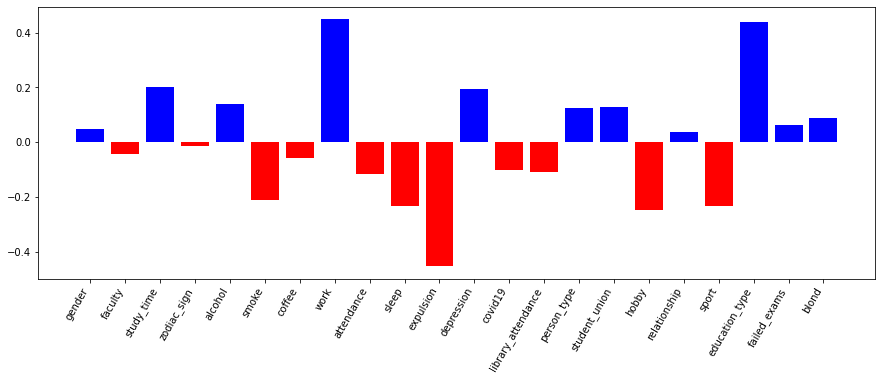

In [113]:
def visualize_coefficients(classifier, feature_names):
  coef = classifier.coef_.ravel()
  norm = 0
  for i in coef:
    norm += i * i
  
  norm = np.sqrt(norm)

  new_coef = np.array([])
  for i in coef:
    new_coef = np.append(new_coef, i / norm)

  plt.figure(figsize=(15, 5))
  colors = ["red" if c < 0 else "blue" for c in new_coef]
  plt.bar(np.arange(22), new_coef, color=colors)
  feature_names = np.array(feature_names)
  plt.xticks(np.arange(feature_names.size), feature_names, rotation=60, ha="right")

names = data_frame.drop(columns = 'average_grade').columns
visualize_coefficients(regr, names)
